In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, 'data')

file_name = os.path.join(data_dir, "WBC_CH.csv")
df = pd.read_csv(file_name)
lakes_df = df[df.ref_water_body_type_id_name == "Lakes"]
len(lakes_df)

lakes_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 40 to 119
Data columns (total 55 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   rural_or_urban                                              3 non-null      object 
 1   State Name                                                  3 non-null      object 
 2   District Name                                               3 non-null      object 
 3   Block/Tehsil Name                                           0 non-null      object 
 4   Village Name                                                0 non-null      object 
 5   town_municipalty_name                                       3 non-null      object 
 6   ward_name                                                   3 non-null      object 
 7   si_no_of_water_body_within_village_town                     3 non-null      int64  
 8   unique

In [2]:
lakes_df.nunique()

rural_or_urban                                                1
State Name                                                    1
District Name                                                 1
Block/Tehsil Name                                             0
Village Name                                                  0
town_municipalty_name                                         1
ward_name                                                     3
si_no_of_water_body_within_village_town                       2
unique_id                                                     3
water_body_name                                               3
basin_name                                                    0
sub_basin_name                                                0
ref_water_body_type_id_name                                   1
nature_of_storage                                             0
khasra_number                                                 3
latitude_dec                            

In [3]:
numeric_columns = lakes_df.select_dtypes(include=['int64', 'float64']).columns

# Agregar columnas adicionales
additional_columns = ['unique_id', 'water_body_name', "water_spread_area_of_water_body"]

# Combinar las columnas seleccionadas
columns_to_keep = list(set(numeric_columns) | set(additional_columns))

# Seleccionar las columnas del DataFrame
filtered_df = lakes_df[columns_to_keep]

In [4]:
# df_cleaned = filtered_df.dropna(thresh=50, axis=1) #eliminar columnas con menos de 5 elementos no nulos

In [5]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 40 to 119
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   sub_basin_name                               0 non-null      float64
 1   reason_water_body_in_use_name2               0 non-null      float64
 2   reason_water_body_in_use_name3               0 non-null      float64
 3   scheme_inclusion_year                        0 non-null      float64
 4   extent_of_area_covered_by_wua                0 non-null      float64
 5   renovation_year                              0 non-null      float64
 6   latitude_dec                                 3 non-null      float64
 7   storage_capacity_water_body_original         3 non-null      int64  
 8   no_town_cities_benefited                     3 non-null      float64
 9   number_of_wua_formed                         0 non-null      float64
 10  targeted

In [6]:
filtered_df.head()

,sub_basin_name,reason_water_body_in_use_name2,reason_water_body_in_use_name3,scheme_inclusion_year,extent_of_area_covered_by_wua,renovation_year,latitude_dec,storage_capacity_water_body_original,no_town_cities_benefited,number_of_wua_formed,...,cca_water_body,construction_cost,no_villages_benefited,scheme_under_revival_is_done,target_potential_revival,basin_name,water_spread_area_of_water_body,nature_of_storage,ipc_water_body,water_body_name
40,NaN,NaN,NaN,NaN,NaN,NaN,30.744444,14400,1.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,300.000,NaN,NaN,SUKHNA LAKE
46,NaN,NaN,NaN,NaN,NaN,NaN,30.767500,75636,1.0,NaN,...,NaN,30000000.0,NaN,NaN,NaN,NaN,2.520,NaN,NaN,Dhanas Lake
119,NaN,NaN,NaN,NaN,NaN,NaN,30.727500,31400,1.0,NaN,...,NaN,50000000.0,NaN,NaN,NaN,NaN,1.048,NaN,NaN,Lake


In [7]:
filtered_df.set_index("unique_id")

,sub_basin_name,reason_water_body_in_use_name2,reason_water_body_in_use_name3,scheme_inclusion_year,extent_of_area_covered_by_wua,renovation_year,latitude_dec,storage_capacity_water_body_original,no_town_cities_benefited,number_of_wua_formed,...,cca_water_body,construction_cost,no_villages_benefited,scheme_under_revival_is_done,target_potential_revival,basin_name,water_spread_area_of_water_body,nature_of_storage,ipc_water_body,water_body_name
unique_id,,,,,,,,,,,,,,,,,,,,,
2/30/001/000001/000001/001,NaN,NaN,NaN,NaN,NaN,NaN,30.744444,14400,1.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,300.000,NaN,NaN,SUKHNA LAKE
2/30/001/000001/000005/001,NaN,NaN,NaN,NaN,NaN,NaN,30.767500,75636,1.0,NaN,...,NaN,30000000.0,NaN,NaN,NaN,NaN,2.520,NaN,NaN,Dhanas Lake
2/30/001/000001/000010/004,NaN,NaN,NaN,NaN,NaN,NaN,30.727500,31400,1.0,NaN,...,NaN,50000000.0,NaN,NaN,NaN,NaN,1.048,NaN,NaN,Lake


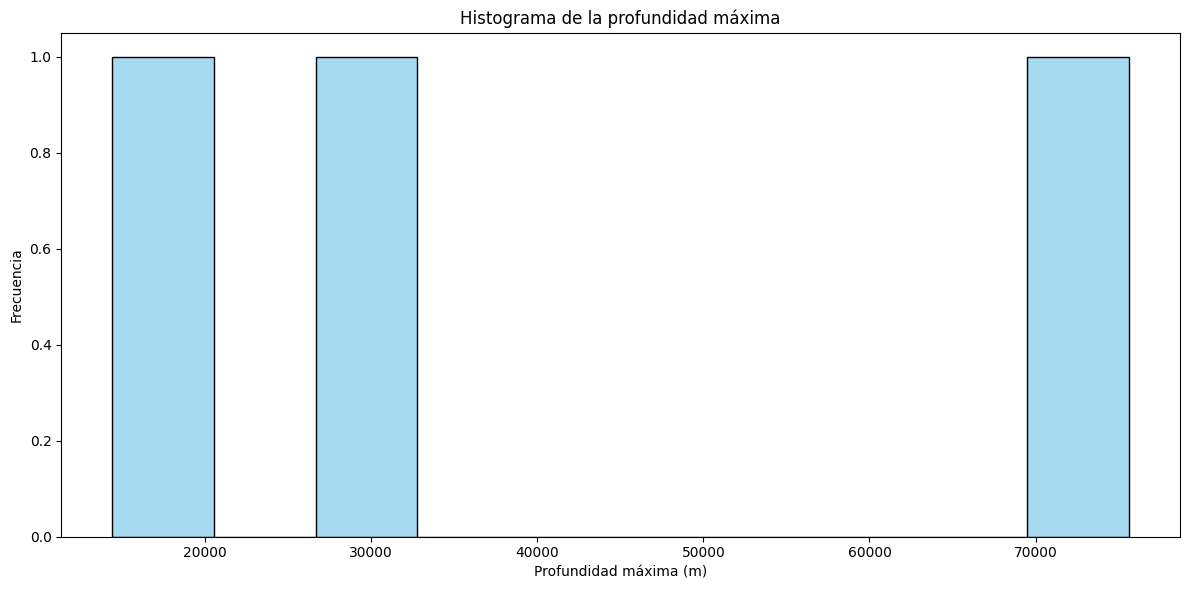

In [8]:
plt.figure(figsize=(12, 6))

# Histograma
sns.histplot(filtered_df['storage_capacity_water_body_original'], kde=False, bins=10, color='skyblue')
plt.title('Histograma de la profundidad máxima')
plt.xlabel('Profundidad máxima (m)')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [80]:
df_sorted = filtered_df.sort_values(by='storage_capacity_water_body_original', ascending=False)

In [81]:
df_sorted.head()

,construcion_year,renovation_cost,renovation_year,extent_of_area_covered_by_wua,no_town_cities_benefited,storage_capacity_water_body_original,reason_water_body_in_use_name2,target_potential_revival,scheme_inclusion_year,basin_name,...,water_body_name,unique_id,storage_capacity_water_body_present,cca_water_body,ref_selection_id_encroachment_assessed_name,reason_water_body_in_use_name3,scheme_status_reason_name,ipc_water_body,latitude_dec,construction_cost
46,2004.0,NaN,NaN,NaN,1.0,75636,NaN,NaN,NaN,NaN,...,Dhanas Lake,2/30/001/000001/000005/001,37818,NaN,NaN,NaN,NaN,NaN,30.767500,30000000.0
119,2010.0,NaN,NaN,NaN,1.0,31400,NaN,NaN,NaN,NaN,...,Lake,2/30/001/000001/000010/004,10000,NaN,NaN,NaN,NaN,NaN,30.727500,50000000.0
40,1958.0,NaN,NaN,NaN,1.0,14400,NaN,NaN,NaN,NaN,...,SUKHNA LAKE,2/30/001/000001/000001/001,12000,NaN,NaN,NaN,NaN,NaN,30.744444,0.0


In [82]:
print(df_sorted[["water_body_name", "latitude_dec", "longitude_dec", "storage_capacity_water_body_original"]].head(25))

    water_body_name  latitude_dec  longitude_dec  \
46      Dhanas Lake     30.767500      76.757778   
119            Lake     30.727500      76.738056   
40      SUKHNA LAKE     30.744444      76.810556   

     storage_capacity_water_body_original  
46                                  75636  
119                                 31400  
40                                  14400  
